<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

<font color='red'>Нормальное распределение у количества комнат на единицу недвижимости (RM) - см. график ниже
</font>

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [37]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное  - <font color='red'>RM</font>
2.   Равномерное - <font color='red'>Не обнаружил</font>
3.   Биноминальное - <font color='red'>LSTAT</font>
4.   Бернулли - <font color='red'>CHAS</font>
5.   Геометрическое - <font color='red'>Не обнаружил</font>
6.   Логнормальное - <font color='red'>DIS</font>



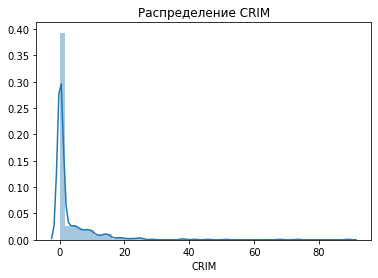

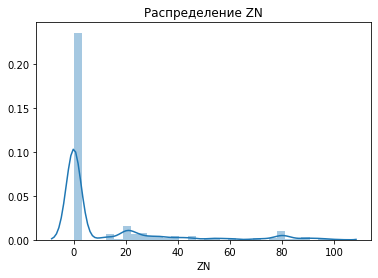

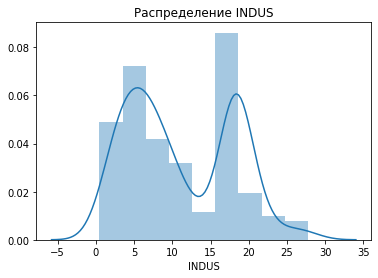

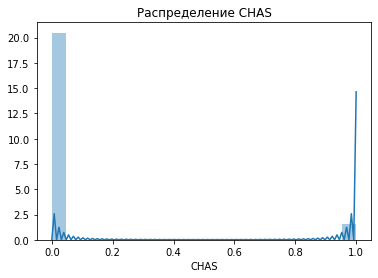

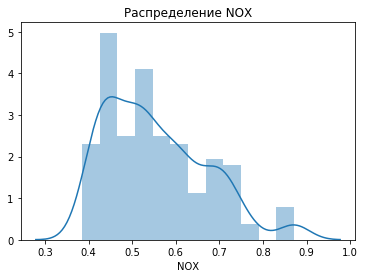

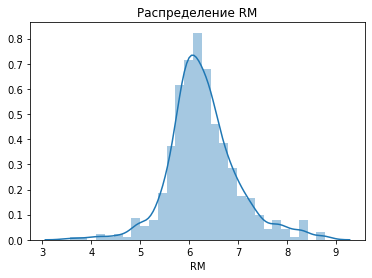

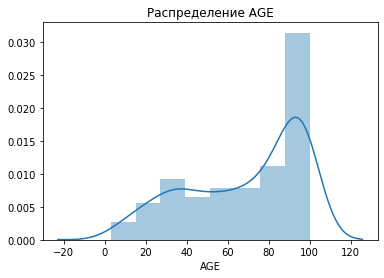

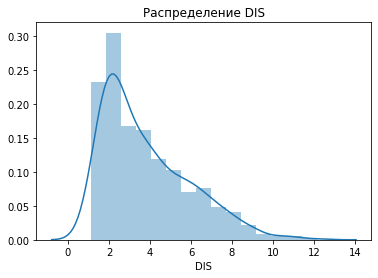

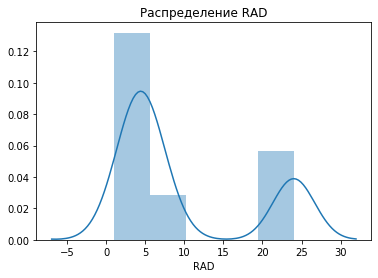

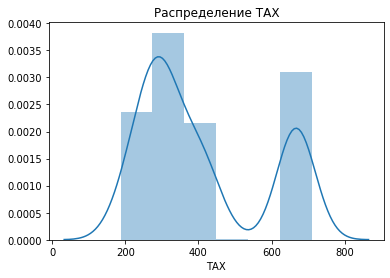

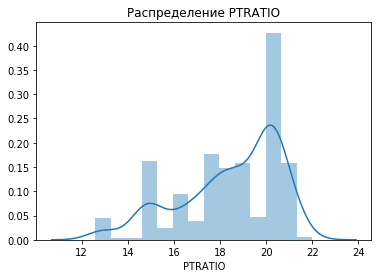

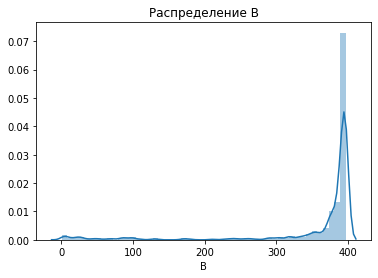

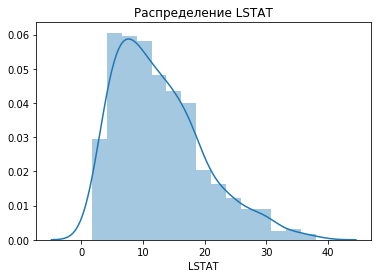

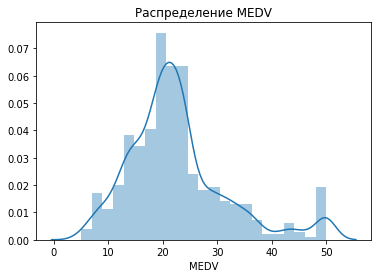

In [3]:
number = 0
while number < 14:
    sns.distplot(data.iloc[:,number])
    plt.title(f'Распределение {data.columns[number]}')
    plt.show()
    
    number += 1

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [50]:
data[['MEDV', 'LSTAT']].fillna(0, inplace=True)

In [51]:
medv = data['MEDV']
lstat = data['LSTAT']

In [53]:
medv = np.array(medv).reshape(-1,1)
lstat = np.array(lstat).reshape(-1,1)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    medv,
    lstat,
    test_size = 0.2,
    random_state = 777
)

In [58]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
predicted_y = model.predict(X_test)

In [60]:
model.score(X_test, y_test)

0.5021945631152199

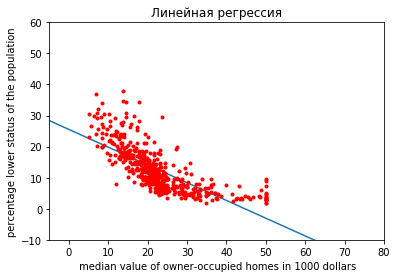

In [72]:
plt.xlabel(' median value of owner-occupied homes in 1000 dollars')
plt.ylabel('percentage lower status of the population')
plt.title('Линейная регрессия')
x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(medv, lstat, 'r.')
plt.xlim(-5,80)
plt.ylim(-10,60)
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [73]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [74]:
data = data.dropna(subset=['Corruption', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'])
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [75]:
A = data.iloc[:, 1:]

In [76]:
np.around(np.cov(A.T), decimals=2)

array([[2088.55, 1171.89, 1037.04, 1097.68, 1745.01, 1126.44,  437.44,
         992.82, 1625.96, 1661.55],
       [1171.89, 2127.17,  184.7 , 1298.8 , 1268.03,  520.63,  498.42,
         796.97, 1327.72, 1293.22],
       [1037.04,  184.7 , 1965.29,  694.32,  880.14, 1392.96,  427.19,
         826.97,  597.46,  661.01],
       [1097.68, 1298.8 ,  694.32, 1980.8 , 1369.01,  835.04,  316.04,
         697.81, 1091.7 ,  992.68],
       [1745.01, 1268.03,  880.14, 1369.01, 2099.09,  989.15,  290.98,
         918.33, 1592.89, 1521.9 ],
       [1126.44,  520.63, 1392.96,  835.04,  989.15, 2034.82,  784.24,
        1005.23,  754.77,  841.07],
       [ 437.44,  498.42,  427.19,  316.04,  290.98,  784.24, 1819.54,
         536.4 ,  344.25,  279.48],
       [ 992.82,  796.97,  826.97,  697.81,  918.33, 1005.23,  536.4 ,
        2000.57,  891.58,  891.37],
       [1625.96, 1327.72,  597.46, 1091.7 , 1592.89,  754.77,  344.25,
         891.58, 1879.77, 1665.84],
       [1661.55, 1293.22,  661.01,  9

In [77]:
standardized = (A - A.mean()) / A.std()

In [78]:
np.around(np.cov(standardized.T), decimals=2)

array([[1.  , 0.56, 0.51, 0.54, 0.83, 0.55, 0.22, 0.49, 0.82, 0.83],
       [0.56, 1.  , 0.09, 0.63, 0.6 , 0.25, 0.25, 0.39, 0.66, 0.64],
       [0.51, 0.09, 1.  , 0.35, 0.43, 0.7 , 0.23, 0.42, 0.31, 0.34],
       [0.54, 0.63, 0.35, 1.  , 0.67, 0.42, 0.17, 0.35, 0.57, 0.51],
       [0.83, 0.6 , 0.43, 0.67, 1.  , 0.48, 0.15, 0.45, 0.8 , 0.76],
       [0.55, 0.25, 0.7 , 0.42, 0.48, 1.  , 0.41, 0.5 , 0.39, 0.42],
       [0.22, 0.25, 0.23, 0.17, 0.15, 0.41, 1.  , 0.28, 0.19, 0.15],
       [0.49, 0.39, 0.42, 0.35, 0.45, 0.5 , 0.28, 1.  , 0.46, 0.45],
       [0.82, 0.66, 0.31, 0.57, 0.8 , 0.39, 0.19, 0.46, 1.  , 0.87],
       [0.83, 0.64, 0.34, 0.51, 0.76, 0.42, 0.15, 0.45, 0.87, 1.  ]])

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [79]:
#Считаем отсутстующие значения

def nan_count(row):
    return row.isnull().sum()

data['nan_number'] = data.apply(nan_count, axis=1)
data['nan_number'].sum()

0

In [80]:
data[data['Country (region)'].isnull()]

#в выборке country нет отсутствующих значений

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,nan_number


Сколько стран в выборке? Написать ответ. 

In [81]:
countries = data['Country (region)']
c_list = set(countries)
print(f'Всего {len(c_list)} уникальных стран')

Всего 140 уникальных стран


Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента. 

In [82]:
continents = pd.read_csv('countryContinent.csv')
continents = continents[['country', 'continent']]
continents.columns = ['Country (region)', 'continent']
continents.head()

,Country (region),continent
0,Afghanistan,Asia
1,Еland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


In [97]:
joined = data.merge(continents, on='Country (region)', how='left')
joined = joined[joined['continent'].notnull()]
joined.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,nan_number,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,0,Europe
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,0,Europe
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,0,Europe
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,0,Europe
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,0,Europe


In [100]:
joined = joined.drop(['nan_number'], axis=1)
dc = joined.groupby('continent').mean().reset_index()
dc

,continent,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Africa,122.384615,114.846154,92.102564,106.923077,119.769231,102.615385,77.666667,107.512821,118.717949,121.358974
1,Americas,45.950000,103.500000,29.150000,80.450000,57.550000,54.500000,81.600000,82.950000,75.200000,56.800000
2,Asia,90.137931,64.413793,87.965517,73.931034,84.896552,73.172414,73.655172,65.586207,82.793103,79.103448
3,Europe,41.205882,36.882353,79.088235,51.058824,34.500000,68.058824,72.382353,62.029412,34.382353,32.558824
4,Oceania,9.500000,20.500000,34.500000,24.500000,6.000000,12.500000,9.000000,7.000000,22.000000,12.000000


Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

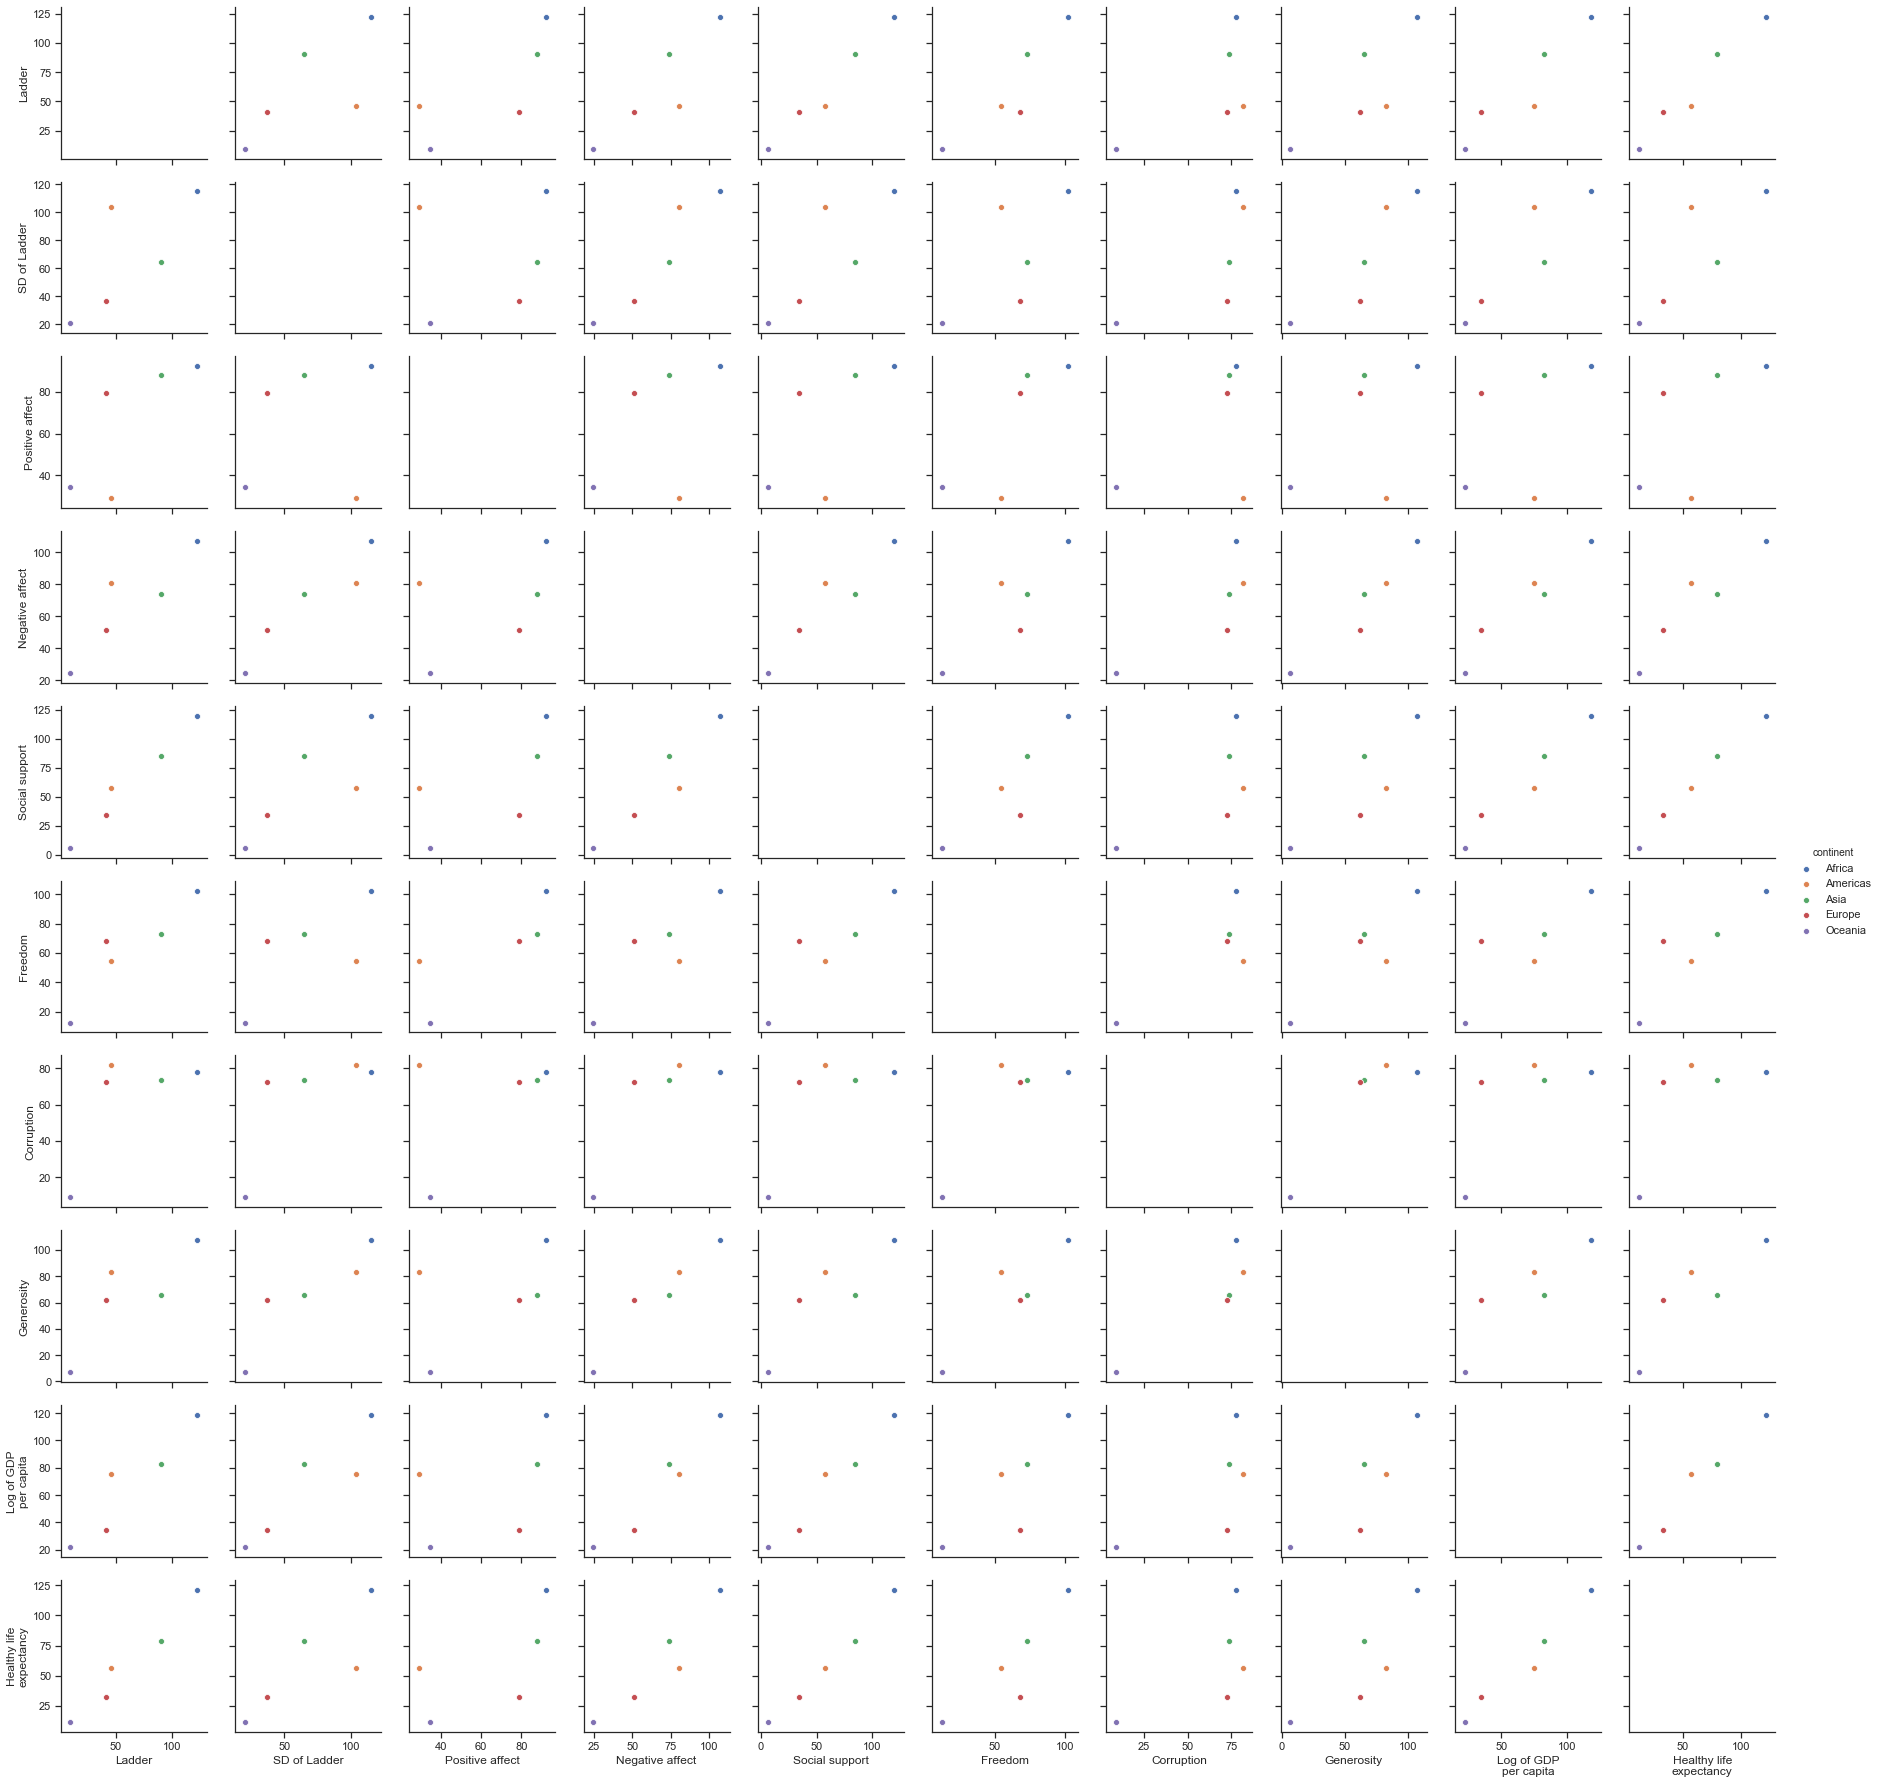

In [101]:
# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=dc, hue='continent')
plt.show()

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

<font color='red'>Ladder & Freedom, Ladder & Corruption близки Европа и Америка
SD of Ladder & Corruption - Америка и Африка
Positive affect & Freedom, Positive affect & Generosity - Европа и Азия
Positive affect & Corruption - Европа, Азия и Африка
Negative affect & Log of GDP per capita - Америка и Азия
Freeom & Corruption, Freedom & Generosity - Европа и Азия

По многим показателям схожи Европа и Азия</font>

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

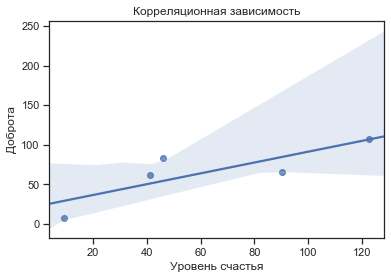

In [102]:
ladder = dc['Ladder']
generosity = dc['Generosity']
sns.regplot(x= ladder, y=generosity,data=dc, fit_reg=True)
plt.xlabel('Уровень счастья')
plt.ylabel('Доброта')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

Можно ли сказать, что данная прямая является собственным вектором? 

<font color='red'>
Думаю да - и прямая, и собственный вектор, показывают направление наибольшего разброса.
Плюс визуально прямая первпендикулярна собственному вектору № 2
</font>

Собственное значение:  3056.35 Собственный вектор:  [0.77950119 0.62640075]


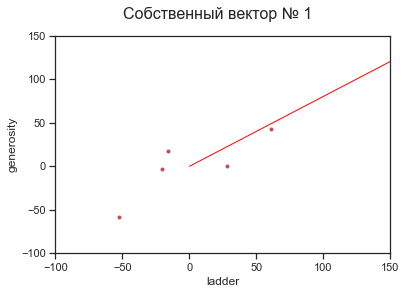

Собственное значение:  290.37 Собственный вектор:  [-0.62640075  0.77950119]


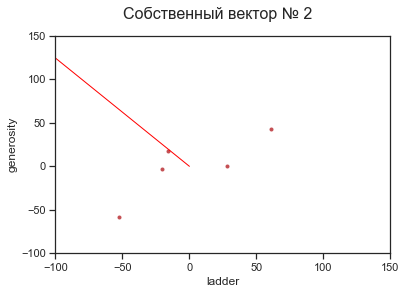

In [108]:
import statistics
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler
ladder = dc['Ladder']
generosity = dc['Generosity']
mean1 = statistics.mean(ladder)
ladder -= mean1
mean2 = statistics.mean(generosity)
generosity -= mean2
Y = np.vstack((ladder, generosity)).T
w,v = la.eig(np.cov(Y.T))

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(ladder, generosity, 'r.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('ladder')
    plt.ylabel('generosity')
    plt.xlim(-100,150)
    plt.ylim(-100,150)
    plt.plot([mean1, mean1+w[i]*v[:,i][0]], [mean2, mean2 +w[i] * v[:,i][1]],color='red', linewidth=1)
    plt.show()

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

(array([2., 0., 4., 0., 0., 0., 3., 0., 0., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

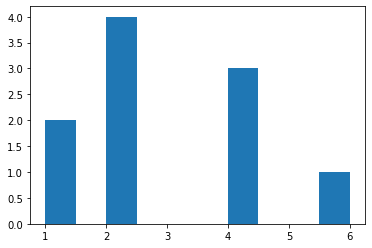

In [17]:
values = []
for i in range(10):
    values.append(np.random.randint(1,7))
    
plt.hist(values)

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

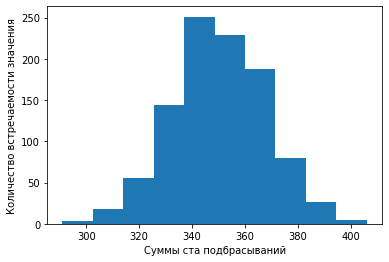

In [27]:
n_experiments = 1000
trials = 100

rng = np.random.RandomState(123)
outcomes = np.empty(n_experiments, dtype=np.float)

for i in range(n_experiments):
    flips = rng.randint(1, 7, size=trials)
    head_counts = np.sum(flips)
    outcomes[i] = head_counts

plt.hist(outcomes)
plt.xlabel('Суммы ста подбрасываний')
plt.ylabel('Количество встречаемости значения')
plt.show()

<font color='red'>Согласно ЦПТ, любое распределение на больших данных стремится к нормальному. Что и произошло  в случае с кубиком.</font>